In [0]:
import tensorflow as tf

In [0]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [0]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [0]:
style_path = tf.keras.utils.get_file('DR GD.jpg', 'https://www.moma.org/wp/inside_out/wp-content/uploads/2016/09/Fig.1_SC1942_1_5_CCCR.jpg?_ga=2.233233564.307676143.1589343064-711569048.1589343064')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
content_path = tf.keras.utils.get_file('DR GDY.jpg', 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhIWFRUXGBUYFxgVGBcYFRcXFRUWFxUXFRUYHSggGBolGxUVITEhJSorLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALEBHAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQIDBgABB//EAD4QAAEDAwIDBgQEBAUDBQAAAAEAAhEDBCESMQVBUQYTImFxgTKRobFCwdHwFCMzUhVicoLhc7LxByQ0Q5L/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAkEQACAgICAgMAAwEAAAAAAAAAAQIRAxIhMRNBBCJRMmFxFP/aAAwDAQACEQMRAD8AU9j3RXh3THsvq1F40hfIbS40V2xiDn3X1Dh75aF5k+J2VyDVjkJeVVIyqK7k3aokzNcXDifJBUaZ9VoarQ7kq2WPOIXLOEr4EQgqW0nyQznFpWpNsNil11woEzC0YvUzqwe3rOjATW0uJ3QlanpbjdecOLjutVAoa1agASO+JcU4eMJa7dcmfK4PgZKxX3SrNjKOuKOcL2kCnUVNWboXOtoUnbJ8LHUNkJV4SUVhp2ZyEtMottMFV1LMtKKt6BV2kuidg2oAqx9yAF5e253Q9ClO+Vyzx7csqgikS7ZFizJ5rqbmtULnigaNkqxpDWXPptaNkFVuuTUMy6NUxKNZw8cldrgViLiVKo7IKN4Hrbg/VNKlvAXtFoG6ZS+tDJ8B9OtjIVgu2oXvmwgalUSppNdAQfWqAlZ3j2xTAVpSvjA5rs+I/vQUjJXjyCtp2KunnB2Kx16yStr2KbhenJF4dhHaijInmFjbli2/acwAshXpSV5eW1kbEyP7A1OuW8kytny2VVTsQQmNvZtAhJw+hGDcVtjTrO8nfnhfTOzh1U2nqAsP2rtz3pPXPyWo7H3gFMNJ2V39oplGuLNX3SFuLWUU2qFxqhGTXom6FBsnBSO0I6rXarqVJqg3JsGnFibu1zoTW8YIwktVrjsk2cWI0CXBbsibegIwkHEKdQPB5LScJy0I72+BUiqu2AlRy5aSrRleN4eN4SvGsnY6ZnXP6hdQguCd3PDA4YQ1Dhul0rohBI1oYUaeFI0cbL1jwMIu2gpmk+BWZy5sJdsrqfCTC0rrYIhltjZDw2BRMTdcPOxSi5oBgmVs+J2lT8LCfQLJ8cs6waSaTwOpaYXNkxeg82Zi6ruLsEqp73EZKsLCoOmNlNQaHR1sxzchGs4m9pgoGhXPMIl5BEkLPZOmM4hbuOCIIKCHFCTDZS65Zkonh1Ibqyx1G2MlwGvrEjcyqKhcBMq0Nl0BM3WuBhc7vYAktqj55ry+cXJo+jpEwhG0zO2CvQ+L/KwJ8mduKZBytP2SvAHgSlfGLckYGyh2cBbVErucrRaPDNl2maCyVk6jgFvOJWWukfRYLiFoWyFw5v5CZFyD1r6NlWOJu5IR9ArxtIjktBRSAq9n0PthZlwwgezb3B8J1xq6BCVcIEOlLCS1oZdG0pVzhWFxSpt6MK9t+FNNJkmgiswnZT71wESoC4Ci64C0pRKSytx1L2uJ3KkIQ7q2FHXISXEgU3duHlEWdLQF7bbo7ugUYUZkG1ArdS5lqrBSVVTFKmuVNeUX3SlTpBxhOn6GQrZSkpraWhOdh1KhxHiFOg3wiTjbcnoEDx3jX8psGNTZwZjHUY5bpXkjC7OrH8OUqv2NqvFKNP8AEMcz+SF/x3UYYNXoY+6+a29+a0EnByfROLvi1Czpa3HVUcPCC6MnoDjnupQz5Mjro7n8bHjRvTWLhJEH1B+yg28gx16+a+c9ke33fv7uq2CTpxkSOchb11IyOY6jfyVpbpk1GNCjj/ZNtV3eUYaTu3kT5eaQjgZbhzSDzlO+KcTube9o0209VvVBD3wSGkAwZHwkGNxkE5xCYGoysC5ohwMOCXJFHLkwOtomOfwToEBW4JUmBst4yirf4YdFPQ5lJnz09nHRJRNnwMjktybcdF6y0Cp2qG24Mhb8Ehya/wCH4T00AF4xoU9UgWzO1OFjoudw5sbJ9WhBVCmuugoy/FrABpwlnD7MSHLa39AOZCQtti35qqyFIsfUHyweiR3HC9UymVlU5FGgBDK7oaZlf8B8l67gIWsDAqywJOhDMV6bnIOsXM5plkhB3dExkrm2roUrZWdvKut67iUPRKOp1mAIpq+QBDeIadyof4gSUqe6SSpsCDaYeB/TvZG6No18LN0yUytpKVpejNIdUKyLpXBQVGlDVI1ICZQbMoWPKFeQrNSz1vxMDcotvE2nmqpSQHjkNXPUWOgOd0Cot67XfiASztRxttBmgAnm53IAg8t5wntpWyvx8MpTRkOLcZ1PIMmNWx9Wkk8gB9/dMbWp/F2xpA5Lf5e48bWNIB8t91gru61AaTMzPnnb5k/PyWi7N3JYWZiS93yGPqPoudxaVntJ30K+FB4c6mB8LnA+gMQnt32eZX/mVQXGIiYAaDJEecD5BC92Kd5WaMDUXjzDsmPLVqTmzuZdGNP72TbaytCNbRpkOH8NoWrQ5lNocYj2nY+5Wy4NxMuYdeIEknYe6wvF67nO1QQBGn99E4tdfcEOxIiI8t02OcnOxMkEoDrinay0pgirUGk+HMc8Yz9dki4Re0xckW9yKzXCX03Ed40DAc07Ob1xK+V9pLLxloJIBw2Rvufv1Wr/APSThZfUq13MjRTLQ4kzkwAGzAjOV6GTFCUL9nHjnKLr0z6mGr0FUiuvC8rn8bOTwsMLQoIbvT1XOrQEJqjeNouc9UPdCqfcIZ90udsFIsqPVZbiUG+6lE8Ol4KVO3QUjzvhsUG5klQuPjLVeGwEyYeiL2QpMrKuo0kSh2yqD7BzrnkuFVL2gyrtZCNg4KBTgKipalwV7n5ICMtWYXJ3wIJHWsYQ1xRI5LSXNvzhC1beRsmcVZmjPBX0wr6ticqNCpmDuqeHixtCTHJpYVQg7iAJIUKF20LeCWtjKBsKDmuAXte1BEArKG+Iy1yupcaqDzVYYmh1jPeI2jm7GUPSceiIq8Qc/cBXUWg4hdC4LpFVJ7uUqntfTeS06fAWZO/i2En0la/hnDWNAc4SY2PJCcRrNq1TSIGnSS70Ef8AC587TVItidSs+LvtQardOA4wQOoOT90z70tfPQaW+RMfYJnxThbadYFv4S7Hrgn2ylDxqdG0TClvtR0a0GcU4gS2nUjxNdoJ6tc0uz7hNLTizWUH1CJdIaB6xssy+80+A/i/LI+oCC7QPJtjB/G2Y6bfcpo49ml+izlqm/w+jcMe2qGue4E9AQRIzB/RFcUvAGuOoR5x9v1Xybs3xB1v3ZcCab9QwYyDyg+Ywevktjw7hdK6a4OuHP0hp5NJBAnG8T911R+PpKjn38kdjLca4mDVPdDvHAE+H4RAk4G8dPJfRf8A0+eW0dDgKdR5Dyz8QaDJJG4knE9ENwTsSxlVlRkGHA5MaT/dhaIdmm2dxRq0y51MtqU6mogvBedbHOOJgyJ3g+Uq2ZS0pE4a7cjOq+DlR/jAEsu7olxVWSQottk5f0MzfBUXF2o0qIVtxQBGAoyi3xZFxbF9S6UBcYVVSiZRNtYB7YJyuecHDsVwoT1rveE57PViGmUBV4I9hmdQWr4FYDu4IhUx4faClXIir1m95nmva0wmHEeEQdQ5GVVUAIhM4NdmdMXtrHQh7Z5LimTKImFW63DCh6sLoFqCCpCr5Lyp5L1tNC/wUDFwJTmxqeFZbU5sJlQ4iAMqOKM7dj6GgqVARhCvcAUqocUl0BFvY0jVOV1eNy5CsTYb3QI2QlThoORurDW0gGUypN1NBCdQfQ6xNCapaA+EoWrwkdE/bbZkppRpMcITqL/RtWkYynw6FOlQzC3DOFUyJKmeHUQNk/XZtjFC0k4CecO4d3fjeBtz3TkUKbMho90o7Q3p7o6d8bcshc+fLUXRfFByaCry/AbA+iwV5xJ9KuXNAMwJdsDIzA3IhaO0rF9Oecc/0KynGmHURzXBLI9kztx41TRRx+670N0nJbJPTUSAPaFnOI1ajHO0faUWx5a8OPmCD7x9VJzZOT1lXg9X+matUZeg8l2okk+e60VtQD/A4AtIyDsZ3QF1ZgOlpmfqjbCqNir5Z7K4kYquGLuI9mKrHgUvGwmWgOEjqCHfce6nwk1rWvL2O8MhwAdkEbB4Hw4BkAjGyu4haRVa5xJDhjO0Hl03W67NWEinULnaNbmOBMgz8JzsJBz5p/8Aqkkr5E/5o29eB12V4xRr09THhm2oOPiBgSHDqCJT2u4uaGE69nBzSC2MiP3tlY/jVp/7ptFrtNMtY+BiRqh4MbiJWy4DTYQ5rRhsemQmj8rd60DLiUY7i+pw9VvsCFqXUWhQcGlU1ONtMQ29seaJNKUwGlu4Q77ho2CnKDYuvIqfYHUmdrwtmmefkp/xg6KmrxVgmAnUf0zi2Mrm3Zo9kAy6LW7IGtxxsRBSqtxZxBDRCDxtvjg3j/WPBeSMpNXfLidkpHFXtJnZB3XFS4nMIPA2uWHxxHf8aBuULxLiLSAG7pDTqEk81XW1lP4IpcjJL8GtvxAiQVW6/PVLtLgJO6Z2tGiWgucJ9UfHFGaRUy3Lm6tfsp1KIDQV1laCfX5KjjNGo074/e6zgvQebLWubuIlWd9Gd0ssKBc7Ykev5JoQANso1XYybLWVi7kY8034detghxiEpov9kw4fZd4ZOGjc8kG4oLth4qd4YZKYWtmW5cST0G3uo0bimzwtEDrG6ruOKAGAVDJnXopHFIa6+vy5KqrXcPhAJ9YhKK3Fo3Sap2mdk6RvpGVySzWy8cD7HfE+IFjHSfFtPIT0SqhxDWQCREjfKVcavXd2JMmZPqc/8eyGtbnwxPr1z1KjbbLKKSNlWq02NOf381lbyoHEmOfNVniBBjSI/fT7KitctcMA+vJTm7GgtRVxrbHlCWsqGU+r0A46iMThQtrcEPxy+pIj8lWGVKIJR5ETKzTDdtvix1n7hEVbEkBzNx8iuq2epwPQPj0kfoieHN0Ej38iPT5q0p0riLGNumS/hnVqbWgfzGuGkHGrkWgnC2PC65DO4ILSBpyIIeGh4kH1+iG4PQaagdiI1D5wtld0W1GgwMEQenp9VzbeRP8Aoo2oNL9Mjal1a7a4jFOmS75E6fotP2ZJ8fnB+iU8Kqik5z3iCXkbZLWgt5evvC0vC7ZrQC2dB2OzgOQKp8d/dNeifyX9WmTr3GnLkH/GyZamPEeH6hg8uZKWULItmV66dnl8eiba8nxFePqdAqq1Myqm1zzRZkiNQGV4CGjzXmrKoqCclC6Hqwes8DdC3LsY2RWpv4hhCvqNJwPZbcOgtq0zMnZDimyTMBH3l43bSZQN8ymRqzqR2NqVMBY6RBV1Aa3kvMHkq7Zx3hRranmdQB6BFA6C6Fi/JOQdkM6lBiIRFm+o0gEyEx72nz39lOXdCii5vy1ocAFC34uaroe0wN0BVqsNRrQ1zm803t3Na8OLcdB+iaLCm2et4iGPgNgdYXU7guccY6oy57uo8aWED0VzuFvxoG/nEISkl2ykVZ1nbajBMDmUXeXumKbcN8vzV7LQUmR8TtyTMewWVva2kuIn1O3sFyZZt8I6McV2F1eLOBdvA2SynxAzqP79ilwryCSdzv8AohqtSMBc2ll9qHNbibnT+4CW9/4mgnmT8gfz+6GfehsDl+90I2vkuJ/Z/YRhh9glM0txXmn6/kBJ/fVL7OuWnKppXOACf2SP0VdwZOPVLGHoOwz76VYKvz+STULqHAH99P35J5RtdYEISx0FSPdQjPyGSfdQqXUQ0CJOY5I1/CSBOY8jCX1bQTO5CnST5DdhPciGnbJbtjPptyQw4e5niBBAOY3GefmELdXL2gaT88wfdX8N7Qt1gVmgE4LhsR5p1Ceto1q+R/w+WtBGZOI6Hp5T8lu+Ct1Uhq3lZSnQDWNIdqbqBaeUFoIcPrI9inVrdFs/vePzUcX1nbNmW8aRCvZhlbS7Z078+bT5nACc0KoADSk/Hblr6YfMEc+h3af/ANAD/cpNuw9gPP7Hp81eLjCT1JSjKcVsaDv8QoRKBt6+qnM5GENRu3kxOF6mKVxTPPnCpNB9WiDul1W0AzKtq3JKDqPM7prMkV3FCoCC0iOaLfTaGjM9VQGOnJUqxgZKFj0K7kzshLhsATg+SZss9R2VFa20uMiUB6El1bvJBG3NXWrKetuvPkmb6biIEDyQlbhADg5xIdyhbYDR5WtvE4tb4OQQDbFgkuOknr+iY2F85r3AkHyQdzV1VT3jYB2MYW3RNNnllaaiQxxKhWsHsJG6NYAzT3bviRQtnOyXILVhcGZ8XVMgacO59EXaXzWuzBBVBq0RGQAdsIW5aHaYbEHMcwmTSZkjU8PuGvcSMAKdzf6DBPp5ofhtw1rdLWiOZO6T8fvCJHyxC5/kcnThVdj93FWvpwTMev5LD8WvS4xO/lGF5ZXxDDMAyR6g9UBeP1Omf/HkueN3TKypK4llNuPIIOt+qLbWDWAcyZKHq539U67EYBcOVZMbousOio7uSuiLVCMjSud/VFUrmTnp+aHFtzXrKHMlCSiwptF5ctn2Uqh7I5jdYimCFrewjYe/pAx5z9s/ZRyJUNfBoOLucAANkjr1Yx1/fsnXFbrcD6rN1mZJcc7R6rkl2Vx3QHcW7niWiYxJ2kbjy6JVdWhcMAj5fmE5fVcHRTYY5RP7Kudd6hFZndHkXCGnyJiR6gqsJyjygySZV2U46aX8iuZYcNcfwGcT/lknPLUfbZ8MuCZDviEj1HX0hYC7o8xmPiaYkefn6/VNuz3FPEGnkCB8seyT5EL+6X+j4+tTT1idFVnLSXD2Or8lVwC7DpHIOH2CX1OIHQ955A/UEfeEv7P3JG3U/v6BQjF1ZV/h9U4RbNNNzZ54+qCvG6D0VHAb3wgE5G/0/VMOKWst1tONz5L1sEk4Ujyc0Wp8gDbvMYUXXYmIEpVX4gBim4Pd0A/Pkh2VKhEubB+aq2ZRHle+xgSUDcXp/tMoJwPOR6c1abjAxy5pbGqj2rxN34cII8RcBqe1zj5DCJFYAxp1T7KZvIaGuETy3+qYAJVvA+CDBUampxGtzojEIe8LIOkeKMDaVnn8ZuqMl1PwAbzJA8kdUzbNDmjbM1E51Tuib691MOoeFu2MlAcI4k2qwVGtODEHf1TKrVYWHVTOrkZwh/RqT5F771rKeuDEYA3Qru0rv7Xj2TE2rWw4gQ7ocwvLu01OmnpDYHxuGpMqA7IXlBkaqgDRyEImz7vu9YzGOpQgp6zrLyQOTstgb7benkpVarGCWaWdCyCD6780tJ8mprlBlI6jq8TRykYKScaMmQNXmVWe0THAB1VxOYwS2BEkdN0FfcTb6AjBzueYQlC0FTA67iOfnjyVFGrqyCPeEPWvWw4H0nlvnPyVDqgEjy+37CRYwvIM6bwXDxA+itqDcz/5SanUjI/fkire5nLj6BCWNmUyy4qQqTVAKhcPzKDqVoKeGOwOYzr3QhR1xzSh1VWU7rzT+ClwDyDu3glbPsvS0S47QsRweu0v5H8vda60vgGE6hzj97rkyRaZWMrQXxG5GSCkb6suzj7/ACU7m6BZJLjM5MgY3IHMDql1O5c7lE7bYyN457qXi9lFOlRsuzYaHYAIAGeeTH3Wpa9hADmNII6SPl0Xzzhd05hgbEEH0PP239lo6fHARBEHUD+Z+koLHRpSsPu+zdm/en3fnTcRHoNvohbfsVatOoVq2M57vn56F47irQJ3E/PqAVS7tDTJg4xv0g8039MHPpjGt2Vova5ratRocBuGnYzjZCUex1WmCaFVj5BEOBZg7wc526I2lxqjM6h1PUE/8FG2XamjsRGTt0z+gTRhEV5Mi6M0ylcUJa+hVzvDHPbI/wAzAZ9fzWi4Zxyo3wi3rZGzqb439Oijc9rGtkiY5eaYcI40akanRKMVFStGnOUo8pEW1qck1LbRO5LHN/RT/wALoPl1J7mkjadTfkcj5rQNuAGzOB8U8vM9V4+1pVAZaPItx9t/ddii37OJ5K9GVHCao8Opjz5GCB7oK54LcOx3RPTxCI9QVq7lzKB8ZJmS0nfzGMFU0+O0w3XqLmF0bEPaYHhI3Ilwg53Q64Y+za+qsxl3auaQH0nMI5HE+/NDVrmNmzGxkR7+S+j1L2i9ulz2w/wgOgzOxAO/JfM761cHvAY5zA4tcaZkDJ2Z054RarlMfHLbhqgarcl3xaPUckpvaDasHvtOnZvJ2efVMe6YCZbI2E6R6ZdGfJQpUfFAoam4iCSc9ELHonbuaBjS3HpPsr6dKmGu7ySANw+PcjdVGmxoILdJyTLiCR5AqyjT1gMps1PPVxbq/wAp1CDgbrW/Rn0CMoNg6dT+m5MIu1pw0SGg89Qz91dUsKoH9JsYBdTh5gcxpd9Y9kHVZpJaHVhBOJBjKPLBdEqFJ06y1xPKQ4CTvDdtj5D8gG29Vp6HJGwbHMkSZxOQr7ivnwPpsO+RDiR1JEA+vyRNC9c+ZAJOYbGZiZcBPl8t0QUgD+FrwAws1A7iek+ITnBmBHJTp29ck96xroGnwtMEHJDznExnf6o91wXHS9jQ4fDqI88Zd0Bz6JdxD+IdHdsptGNqo1j5EzOcdEezdFLuGUqmH0GDeIgGJ5kRHPkRt7wqcDtnfCwtLRBa5ocek43B65H0RVvUrnwugkZJbUqF23qS7IHLnyVxHijTVO3xPeIk6cnnPMZhb/AUhS3gFM6iWEAD4WhojPMyDt7ISrwJsw3WZ/tpl0E7GRMj5J6+qAPEHDlAL3mNjOmZ6clJ15SMfzHbRmA4aZiIbI2G8rWakZ9/ZuoQC2XAjppO0x4iIO+CAUNU7H1JGHRzyMGTvOwWzoVA4S52oejpAiJgN8Xv02wqbpkxlwgiC0jIwANLjABGYj6rKT9AcEzHHsg7T8Z1ZkSMREGecjMAk7IOrwPR8Qf5EEHy2bke63rGOJJ8WYwS0ABoiYwfTJxKIoVGvlr6rGSwDxvgHI1DSNvSADndMpyFeOJgLDgzoLqckA6SXFrW6hvBnxctk4p0K4bmm12x1HIiMQ1bi2/gm47zO/8AKZ4DI5gA5xueiDZcSRoHhkyHNaQWgCOUzM8v0STt9jwSXRlXsrOGlzHauoAgD8MZ25+y4Q3S1zKgOI8BLTyEuZIxI+i2PDXMIJeB8RgAANwMAN0yTPPl0QxpMeSZLCPw6ckt2OoEdefmpOKKIBoW7WsBeXmdgxmfKc4lSotouJ/mlsfhc0BxjeCCfRGspj4BUMmDDsA+rtjy26qN3SjUyr3UiSGjUccpJg48zzS6Iay6vdtaNFNoaIIcXdP8owT9uqU1KZeXeFzQdi4NJgSXO6Z/4V/DHspRhjTHMR4T/aRlvPbyRNZ1s5wNWm10bfzXO1dDk53WUEvRrFdLhhFOTqnm8Na1jh5HXB3AkQMRhW17KqD/ACTTLhOprzp/3Yc6Njg9d0+p8WdTcTRt4bp6eIjAEmdhO3mpV+0DntM22SdsECBuZjn7ptf0WxHT4bUmHuBLs7PgCM5iDA+6eWdHS+A+GsOZwRiRMwM7zMJfa3dTVLqLY92Z2+LVgxK9q9yTP8PSLvNgeDv+I53nmENUE09LjAa8gnWHgNLYDmnViMHIzHv8pcL4m2kNLKpO+kHVO5jBaZiBz/4zFS8A0gU6MiJLplsf2EZHJBVLu4l72mk5oH4deBynefVFJgaj0bfjIqXjGU9T6Lmme8YAHEEbDWCAD1/5S217IhmrVWqP3JLiwzA0nVLTGP7R7bpFwvjNYxrZS0nIgvnfkZkc+SOHHKoktc2ZO7nHfkOnNM79ipJfxGLezbdQe6pVdp5ueWgGQ78QDY5bcvdEUeB0ifiOQScmc7bn4tuWI9kjqcTq1Il4ABGoupkieUZUX8ZqtJa17jG3hAHy/RDkf0aQ2haAxjhB2MEgZ2jb6IQcEo86kbnwh4aeUlurST5n5JR/HVoB70gl2TEn26KptCuXa+9dv8RJEj/TKwKG9rwikHFwdAHUAajGJJAO5V1Gg5h8B1OaPMny0mBJM5SHi/EKgbp1y10gtA5f5jEhURcOYDJAEadJ5HeVmamauYB1NdzMFoLWnfBO3TB5IR9alJ1lkziRmP8AdJ680tZYHwt1ElwOC4x5zuqK3AwTPgPpMLWHUS3Xwj/U3/tci+H/AAj/AFD7herlZEgav8X+38wntv8A/GH/AFT/ANy5ciLL0UXXxv8A3yCrobH/AEj7rlyQohf+Nnr+aIuf63t+q5ciuzPoOZ8fsPsV4/b9+a5ckCAv3d6t/wC4Ko/Ef9S8XLIDGfEvi9m/ZyhW+Nv/AE/zK5cjLo0Tyj8bff7NQtP+sPX9V6uUx2Lrn+r7/qtfefHS/wCk37LlyeXQovvv6jvb7BC1/wCo398ly5FdCh3J/o37hC8qnp+YXq5BhDa39B375pRbbBcuQCXf3/6f1QXZ/wD+xcuT+hWWn+o3981XW+P/AHrlyPsz6GN5y9D9kLeb/wC0fkuXKaCaCl/SahB8bVy5J7HRXxf4x6fopUvgPoVy5FGYLYf1G+jkXb7e5+65cg+x/R//2Q==')

In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [0]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

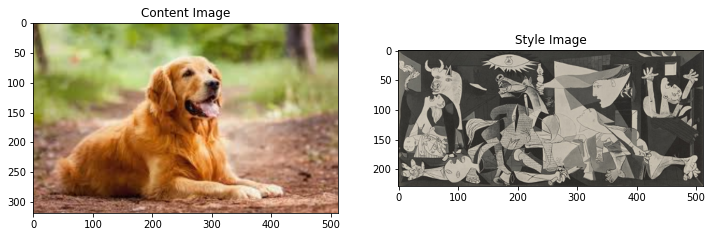

In [0]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

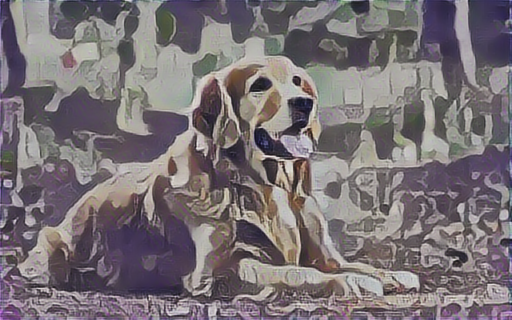

In [0]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [0]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

574717952/574710816 [==============================] - 9s 0us/step


TensorShape([1, 1000])

In [0]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

40960/35363 [==================================] - 0s 0us/step


[('golden_retriever', 0.3668898),
 ('bloodhound', 0.227874),
 ('cocker_spaniel', 0.10009816),
 ('Irish_setter', 0.08417479),
 ('Sussex_spaniel', 0.07863805)]

In [0]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)

80142336/80134624 [==============================] - 1s 0us/step

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [0]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [0]:
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

In [0]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 228, 512, 64)
  min:  0.0
  max:  681.25226
  mean:  23.672985

block2_conv1
  shape:  (1, 114, 256, 128)
  min:  0.0
  max:  3478.357
  mean:  157.47864

block3_conv1
  shape:  (1, 57, 128, 256)
  min:  0.0
  max:  5685.648
  mean:  168.34792

block4_conv1
  shape:  (1, 28, 64, 512)
  min:  0.0
  max:  15036.261
  mean:  625.7975

block5_conv1
  shape:  (1, 14, 32, 512)
  min:  0.0
  max:  2143.9307
  mean:  48.54303



In [0]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [0]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

In [0]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  9.940185e-06
    max:  18119.473
    mean:  321.49207

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  45418.07
    mean:  8380.426

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  206283.75
    mean:  8398.106

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  2292169.0
    mean:  146907.7

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  68528.19
    mean:  1288.2214

Contents:
   block5_conv2
    shape:  (1, 19, 32, 512)
    min:  0.0
    max:  2533.2214
    mean:  13.872592


In [0]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [0]:
image = tf.Variable(content_image)

In [0]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [0]:
style_weight=1e-2
content_weight=1e4

In [0]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [0]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

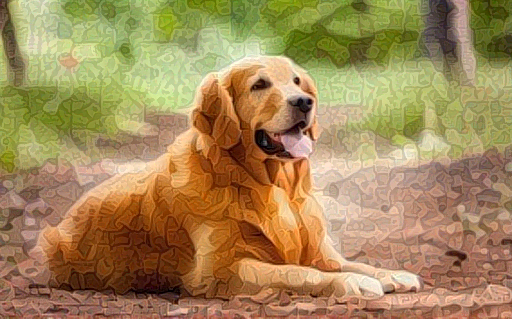

In [0]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

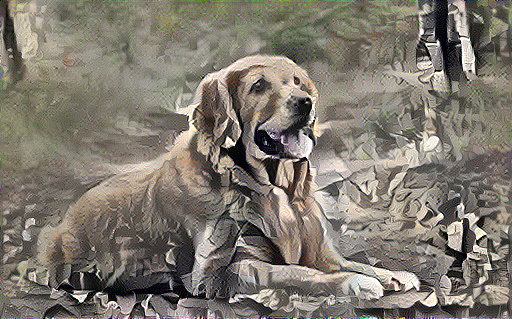

Train step: 1000
Total time: 4690.8


In [0]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

In [0]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

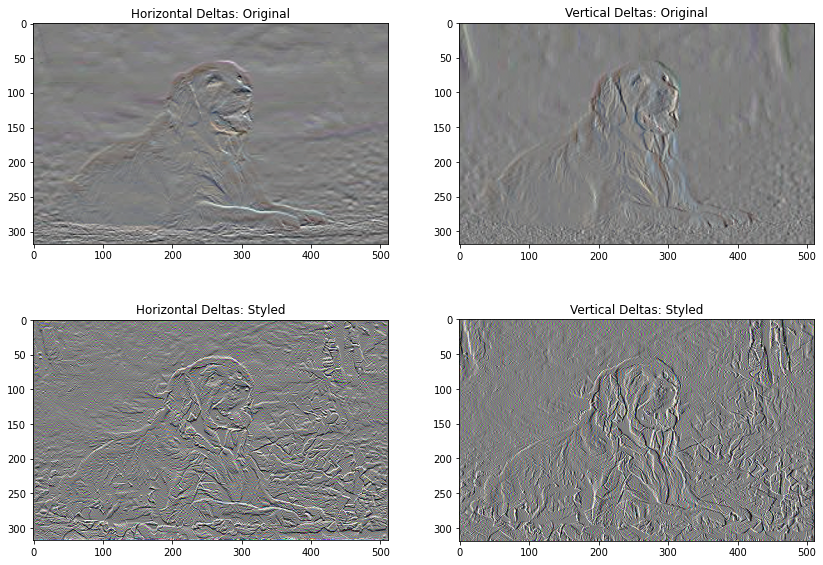

In [0]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

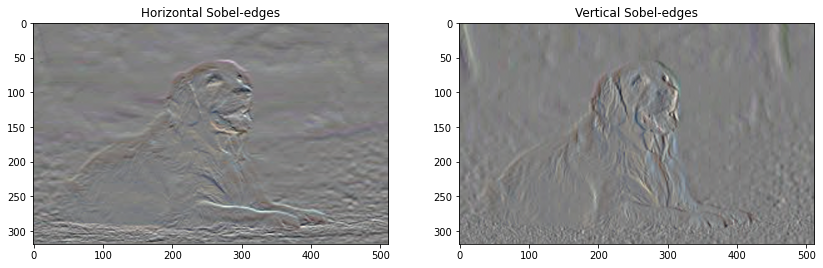

In [0]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

In [0]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [0]:
total_variation_loss(image).numpy()

89374.99

In [0]:
tf.image.total_variation(image).numpy()

array([89374.99], dtype=float32)

In [0]:
total_variation_weight=30

In [0]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [0]:
image = tf.Variable(content_image)

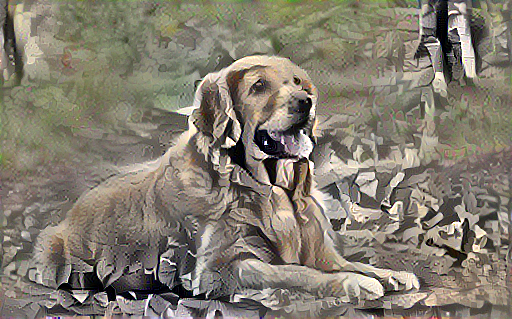

Train step: 500
Total time: 2357.7


In [0]:
import time
start = time.time()

epochs = 5
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [0]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)